# Polarity Reversal of Wakefields Driven by Ultrashort Pulse Laser

P. Valenta,$^{1, \, 2, \, \mathrm{*}}$ T. Zh. Esirkepov,$^{3}$ J. K. Koga,$^{3}$ A. Necas,$^{4}$ G. M. Grittani,$^{1}$ C. M. Lazzarini,$^{1}$ O. Klimo,$^{1, \, 2}$ G. Korn,$^{1}$ and S. V. Bulanov$^{1, \, 3}$

$^{1)}$ ELI Beamlines, Institute of Physics, Czech Academy of Sciences, Na Slovance 2, 18221 Prague, Czech Republic  
$^{2)}$ Faculty of Nuclear Sciences and Physical Engineering, Czech Technical University in Prague, Brehova 7, 11519 Prague, Czech Republic  
$^{3)}$ Kansai Photon Science Institute, National Institutes for Quantum and Radiological Science and Technology, Umemidai 8-1-7, Kizugawa, 619-0215 Kyoto, Japan  
$^{4)}$ TAE Technologies, Inc., Foothill Ranch, California 92610, USA

$^{\mathrm{*}}$ Electronic mail: <petr.valenta@eli-beams.eu>

(Dated: 28 October 2020)

### Abstract

Using an analytical model and computer simulation, we show that the wakefield driven by an ultrashort laser pulse in high-density plasma periodically reverses its polarity due to the carrier-envelope phase shift of the driver. The wakefield polarity reversal occurs on spatial scales shorter than the typical length considered for electron acceleration with the laser-wakefield mechanism. Consequently, the energies of accelerated electrons {\color{red} are} significantly affected. The results obtained are important for the laser-wakefield acceleration under the conditions relevant to present-day high-repetition-rate laser systems. 

---

### libraries:

In [1]:
import sdf  
import numpy as np
import scipy as sc
from scipy.constants import pi, m_e, c, elementary_charge, epsilon_0
from scipy.signal import savgol_filter 
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 3.0
mpl.use("pdf")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("SDF:", sdf.__version__)
print("NumPy", np.__version__)
print("Matplotlib:", mpl.__version__)
print("SciPy:", sc.__version__)

SDF: 2.6.7
NumPy 1.17.3
Matplotlib: 3.1.1
SciPy: 1.3.1


### constants and data:

In [3]:
lambda_0 = 1.0e-6
a_0 = 0.5
beta_g = 0.975
phi = 3.0 * np.pi / 4.0
k_c = 1.0
delta_k = k_c / 2.0
X = np.linspace(0.0, 100.0, 1000)
T = np.linspace(-20.0, 100.0, 1000)
x, t = np.meshgrid(X, T)
grid_x = np.linspace(0, 120, 4801)
grid_t = np.linspace(0, 120, 2400)

In [4]:
e_x = np.load("./data/wakefield.npy")
e_z = np.load("./data/laser.npy")
inj_0 = sdf.read("./data/inj_0.sdf")
inj_1 = sdf.read("./data/inj_1.sdf")
inj_2 = sdf.read("./data/inj_2.sdf")
inj_3 = sdf.read("./data/inj_3.sdf")
inj_4 = sdf.read("./data/inj_4.sdf")

### analytical model:

In [5]:
def wakefield(x, t, beta_g, a_0, k_c, delta_k, phi):
    return np.heaviside(-(x - beta_g * t), 0) * a_0**2 * k_c / (2.0 * beta_g * delta_k) * np.sin((x - beta_g * t) / beta_g) \
            * np.sin(2.0 * k_c * (1 - beta_g**2) / beta_g**2 * x - 2.0 * phi)

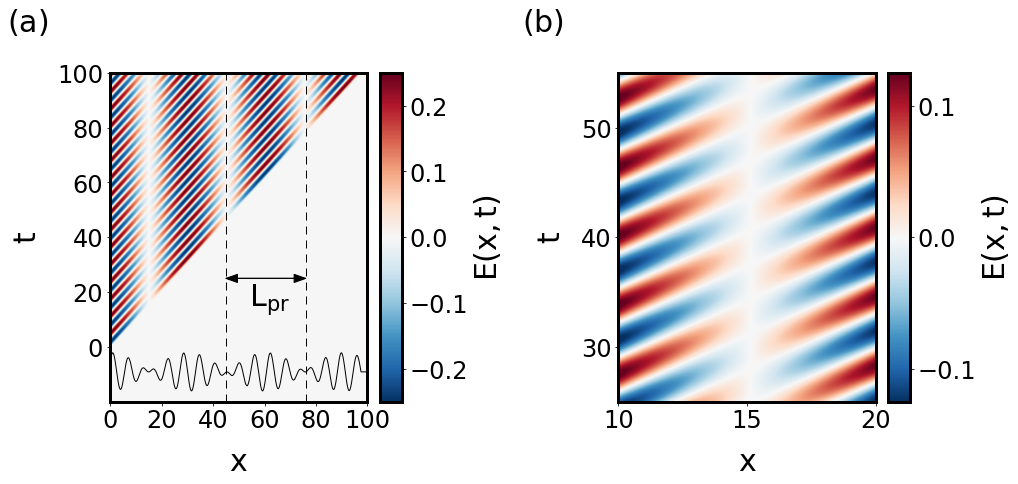

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))

im_1 = ax[0].imshow(wakefield(x, t, beta_g, a_0, k_c, delta_k, phi), aspect="auto", origin="lower", interpolation="gaussian", \
    extent=[X.min(), X.max(), T.min(), T.max()], cmap="RdBu_r", vmin=-0.25, vmax=0.25)
ax[0].set_xlim(X.min(), X.max())
ax[0].set_ylim(T.min(), T.max())
ax[0].get_xaxis().set_ticks([0, 20, 40, 60, 80, 100])
ax[0].get_yaxis().set_ticks([0, 20, 40, 60, 80, 100])
ax[0].tick_params(axis="both", which="major", labelsize=24)
ax[0].set_ylabel(r"$ \mathrm{t} $", fontsize=30, labelpad=15)
ax[0].set_xlabel(r"$ \mathrm{x} $", fontsize=30, labelpad=15)
ax[0].text(-40, 115, r"$ \mathrm{(a)} $", fontsize=30)

cbar_1 = plt.colorbar(im_1, ax=ax[0], aspect=15, pad=0.04)
cbar_1.set_label(label=r"$ \mathrm{E (x, t)} $", fontsize=30)
cbar_1.ax.tick_params(labelsize=24)
cbar_1.ax.yaxis.offsetText.set_size(12)
cbar_1.locator = mpl.ticker.MaxNLocator(nbins=5)
cbar_1.update_ticks()

ax0_b = ax[0].twinx()
ax0_b.plot(X, wakefield(x, t, beta_g, a_0, k_c, delta_k, phi)[999, :], color="black", linestyle="-", linewidth=1.0)
ax0_b.set_xlim(X.min(), X.max())
ax0_b.set_ylim(-0.4, 4)
ax0_b.get_yaxis().set_ticks([])

ax[0].axvline(45, linestyle="--", linewidth=1, color="black", dashes=(8, 6))
ax[0].axvline(45 + 31, linestyle="--", linewidth=1, color="black", dashes=(8, 6))
ax[0].arrow(45, 25, 31, 0, length_includes_head=True, head_width=3, color="black")
ax[0].arrow(45 + 31, 25, -31, 0, length_includes_head=True, head_width=3, color="black")
ax[0].text(54, 15, r"$ \mathrm{L_{pr}} $", rotation='horizontal', fontsize=30)

im_2 = ax[1].imshow(wakefield(x, t, beta_g, a_0, k_c, delta_k, phi), aspect="auto", origin="lower", interpolation="gaussian", \
    extent=[X.min(), X.max(), T.min(), T.max()], cmap="RdBu_r", vmin=-0.125, vmax=0.125)
ax[1].set_xlim(10, 20)
ax[1].set_ylim(25, 55)
ax[1].get_yaxis().set_ticks([30, 40, 50])
ax[1].tick_params(axis="both", which="major", labelsize=24)
ax[1].set_ylabel(r"$ \mathrm{t} $", fontsize=30, labelpad=15)
ax[1].set_xlabel(r"$ \mathrm{x} $", fontsize=30, labelpad=15)
ax[0].text(160, 115, r"$ \mathrm{(b)} $", fontsize=30)

cbar_2 = plt.colorbar(im_2, ax=ax[1], aspect=15, pad=0.04, ticks=[-0.1, 0, 0.1])
cbar_2.set_label(label=r"$ \mathrm{E (x, t)} $", fontsize=30)
cbar_2.ax.tick_params(labelsize=24)
cbar_2.ax.yaxis.offsetText.set_size(12)

fig.tight_layout(pad=3)
fig.subplots_adjust(wspace=0.6)

### comparison between dephasing and polarity reversal lengths:

In [7]:
def L_d(n_0):
    return pi * np.sqrt(1.0 - n_0) / (1.0 - np.sqrt(1.0 - n_0))

In [8]:
def L_pr(n_0):
    return pi / 2.0 * np.sqrt(1.0 / n_0 - 1.0)

In [9]:
n_0 = np.logspace(-4, 0, 10000)

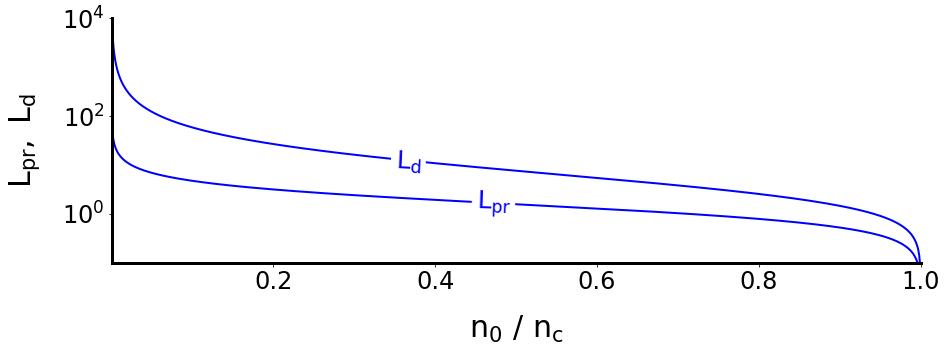

In [10]:
fig, ax = plt.subplots(figsize=(14.5, 4.5))
ax.semilogy(n_0, L_d(n_0), linewidth=2, color="blue")
ax.semilogy(n_0, L_pr(n_0), linewidth=2, color="blue")
ax.set_ylim(1.0e-1, 1.0e4)
ax.set_xlim(1.0e-4, 1.0e0)
ax.tick_params(axis="both", which="major", labelsize=24)
ax.set_xlabel(r"$ \mathrm{n_0 \ / \ n_c} $", fontsize=30, labelpad=20)
ax.set_ylabel(r"$ \mathrm{L_{pr}, \ L_{d}} $", fontsize=30, labelpad=20)
ax.get_yaxis().set_ticks([1e0, 1e2, 1e4])
ax.text(0.35, 8.0, r"$ \mathrm{L_{d}} $", bbox=dict(facecolor="white", edgecolor="white", alpha=1.0), color="blue", rotation=-3, fontsize=25)
ax.text(0.45, 1.2, r"$ \mathrm{L_{pr}} $", bbox=dict(facecolor="white", edgecolor="white", alpha=1.0), color="blue", rotation=-2, fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### electron acceleration by modulated wakefield:

In [11]:
def delta_e(x, beta_g, a_0, k_c, delta_k, phi):
    L_d = np.pi * beta_g / (1.0 - beta_g)
    L_pr = np.pi * beta_g**2 / (2.0 * k_c * (1.0 - beta_g**2))
    A = 0.5 * np.pi * (1.0 / L_d + 1.0 / L_pr)
    B = 0.5 * np.pi * (1.0 / L_d - 1.0 / L_pr)
    return a_0**2 * k_c / (4.0 * beta_g * delta_k) * (np.cos(B * x + 2.0 * phi) * np.sin(B * x) / B \
            - np.cos(A * x - 2.0 * phi) * np.sin(A * x) / A)

In [12]:
phi_opt = np.pi / 4.0 * (1.0 + 2.0 * k_c * (1.0 + beta_g) / beta_g)

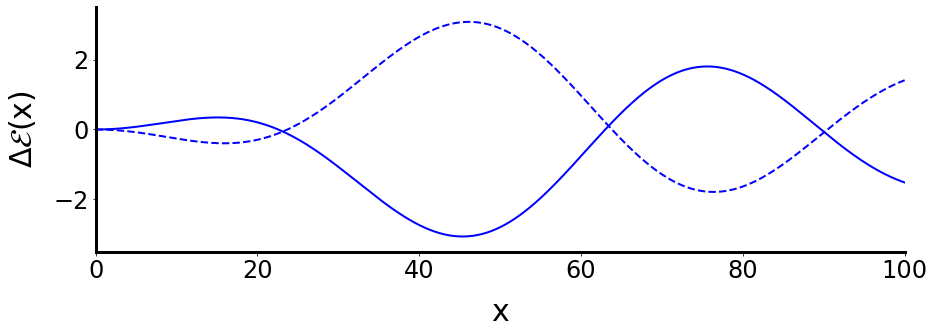

In [13]:
fig, ax = plt.subplots(figsize=(14.5, 4.5))
ax.plot(X, delta_e(X, beta_g, a_0, k_c, delta_k, phi), color="blue", linestyle="-", linewidth=2)
ax.plot(X, delta_e(X, beta_g, a_0, k_c, delta_k, phi_opt), color="blue", linestyle="--", linewidth=2)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0, 100)
ax.get_xaxis().set_ticks([0, 20, 40, 60, 80, 100])
ax.get_yaxis().set_ticks([-2, 0, 2])
ax.tick_params(axis="both", which="major", labelsize=24)
ax.set_ylabel(r"$ \mathrm{\Delta \mathcal{E} \left( x \right)} $", fontsize=30, labelpad=15)
ax.set_xlabel(r"$ \mathrm{x} $", fontsize=30, labelpad=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### particle-in-cell simulation analysis:

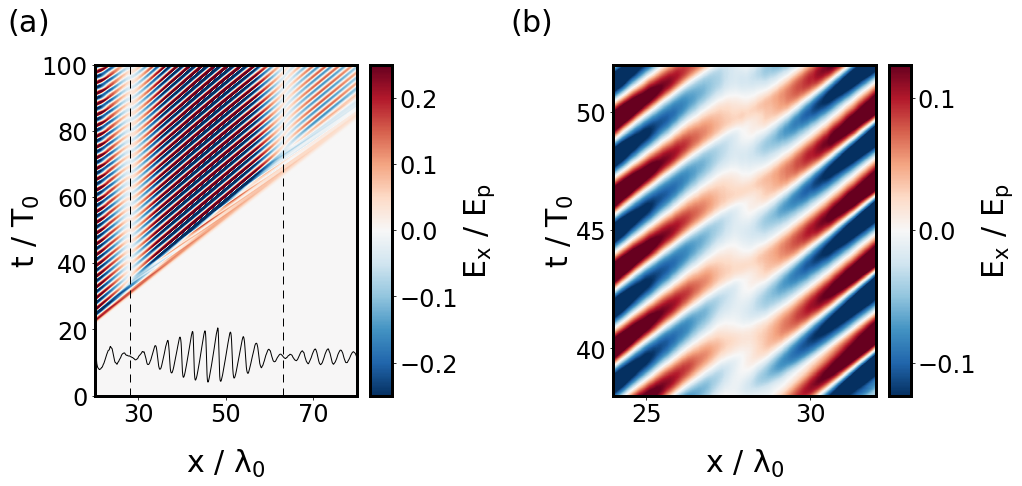

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))
im_1 = ax[0].imshow(savgol_filter(e_x, 31, 3), extent=[grid_x.min(), grid_x.max(), grid_t.max(), grid_t.min()], \
          aspect="auto", cmap="RdBu_r", interpolation="gaussian", vmin=-0.25, vmax=0.25)
ax[0].set_ylim(0, 100)
ax[0].tick_params(axis="both", which="major", labelsize=24)
ax[0].get_xaxis().set_ticks([30, 50, 70])
ax[0].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0} $", fontsize=30, labelpad=20)
ax[0].set_ylabel(r"$ \mathrm{t \ / \ T_0} $", fontsize=30, labelpad=0)
ax[0].text(0, 110, r"$ \mathrm{(a)} $", fontsize=30)

cbar_1 = plt.colorbar(im_1, ax=ax[0], aspect=15, pad=0.04)
cbar_1.set_label(label=r"$ \mathrm{E_x \ / \ E_p} $", fontsize=30)
cbar_1.ax.tick_params(labelsize=24)
cbar_1.ax.yaxis.offsetText.set_size(12)
cbar_1.locator = mpl.ticker.MaxNLocator(nbins=5)
cbar_1.update_ticks()

ax_0 = ax[0].twinx()
ax_0.plot(grid_x, savgol_filter(e_x[2000, :], 15, 3), color="black", linestyle="-", linewidth=1.0)
ax_0.set_xlim(20, 80)
ax_0.set_ylim(-0.8, 6.0)
ax_0.get_yaxis().set_ticks([])

im_2 = ax[1].imshow(savgol_filter(e_x, 31, 3), extent=[grid_x.min(), grid_x.max(), grid_t.max(), grid_t.min()], \
          aspect="auto", cmap="RdBu_r", interpolation="gaussian", vmin=-0.125, vmax=0.125)
ax[1].set_ylim(38, 52)
ax[1].set_xlim(24, 32)
ax[1].get_yaxis().set_ticks([40, 45, 50])
ax[1].tick_params(axis="both", which="major", labelsize=24)
ax[1].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0} $", fontsize=30, labelpad=20)
ax[1].set_ylabel(r"$ \mathrm{t \ / \ T_0} $", fontsize=30, labelpad=0)
ax[0].text(115, 110, r"$ \mathrm{(b)} $", fontsize=30)

cbar_2 = plt.colorbar(im_2, ax=ax[1], aspect=15, pad=0.04, ticks=[-0.1, 0.0, 0.1])
cbar_2.set_label(label=r"$ \mathrm{E_x \ / \ E_p} $", fontsize=30)
cbar_2.ax.tick_params(labelsize=24)
cbar_2.ax.yaxis.offsetText.set_size(12)

ax[0].axvline(28.05, color="black", linestyle="--", linewidth=1, dashes=(8, 6))
ax[0].axvline(63.05, color="black", linestyle="--", linewidth=1, dashes=(8, 6))

fig.tight_layout(pad=3)
fig.subplots_adjust(wspace=0.6)

In [15]:
x_inj_0 = inj_0.Grid_Particles_subset_all_inj_electron_inj.data[0] / lambda_0
id_inj_0 = inj_0.Particles_ID_subset_all_inj_electron_inj.data
cond_0 = np.where((x_inj_0 > 4) & (x_inj_0 < 11.9))
ids = id_inj_0[cond_0]

In [16]:
x_inj_1 = inj_1.Grid_Particles_subset_all_inj_electron_inj.data[0] / lambda_0
y_inj_1 = inj_1.Grid_Particles_subset_all_inj_electron_inj.data[1] / lambda_0
z_inj_1 = inj_1.Grid_Particles_subset_all_inj_electron_inj.data[2] / lambda_0
px_inj_1 = inj_1.Particles_Px_subset_all_inj_electron_inj.data / (m_e * c)
py_inj_1 = inj_1.Particles_Py_subset_all_inj_electron_inj.data / (m_e * c)
pz_inj_1 = inj_1.Particles_Pz_subset_all_inj_electron_inj.data / (m_e * c)
id_inj_1 = inj_1.Particles_ID_subset_all_inj_electron_inj.data
cond_1 = np.intersect1d(np.nonzero(np.in1d(id_inj_1, ids)), np.where((y_inj_1**2 + z_inj_1**2) < 1.0))
cond_1b = np.intersect1d(cond_1, np.where(x_inj_1 > 47.25))
Ek_inj_1 = np.sqrt(1.0 + (px_inj_1[cond_1b])**2 + (py_inj_1[cond_1b])**2 + (pz_inj_1[cond_1b])**2) - 1.0
h_1 = np.histogram(Ek_inj_1, bins=np.linspace(0, np.max(Ek_inj_1) + 0.1, 3000))

In [17]:
x_inj_2 = inj_2.Grid_Particles_subset_all_inj_electron_inj.data[0] / lambda_0
y_inj_2 = inj_2.Grid_Particles_subset_all_inj_electron_inj.data[1] / lambda_0
z_inj_2 = inj_2.Grid_Particles_subset_all_inj_electron_inj.data[2] / lambda_0
px_inj_2 = inj_2.Particles_Px_subset_all_inj_electron_inj.data / (m_e * c)
py_inj_2 = inj_2.Particles_Py_subset_all_inj_electron_inj.data / (m_e * c)
pz_inj_2 = inj_2.Particles_Pz_subset_all_inj_electron_inj.data / (m_e * c)
id_inj_2 = inj_2.Particles_ID_subset_all_inj_electron_inj.data
cond_2 = np.intersect1d(np.nonzero(np.in1d(id_inj_2, ids)), np.where((y_inj_2**2 + z_inj_2**2) < 1.0))
cond_2b = np.intersect1d(cond_2, np.where(x_inj_2 > 56.35))
Ek_inj_2 = np.sqrt(1.0 + (px_inj_2[cond_2b])**2 + (py_inj_2[cond_2b])**2 + (pz_inj_2[cond_2b])**2) - 1.0
h_2 = np.histogram(Ek_inj_2, bins=np.linspace(0, np.max(Ek_inj_2) + 0.1, 3000))

In [18]:
x_inj_3 = inj_3.Grid_Particles_subset_all_inj_electron_inj.data[0] / lambda_0
y_inj_3 = inj_3.Grid_Particles_subset_all_inj_electron_inj.data[1] / lambda_0
z_inj_3 = inj_3.Grid_Particles_subset_all_inj_electron_inj.data[2] / lambda_0
px_inj_3 = inj_3.Particles_Px_subset_all_inj_electron_inj.data / (m_e * c)
py_inj_3 = inj_3.Particles_Py_subset_all_inj_electron_inj.data / (m_e * c)
pz_inj_3 = inj_3.Particles_Pz_subset_all_inj_electron_inj.data / (m_e * c)
id_inj_3 = inj_3.Particles_ID_subset_all_inj_electron_inj.data
cond_3 = np.intersect1d(np.nonzero(np.in1d(id_inj_3, ids)), np.where((y_inj_3**2 + z_inj_3**2) < 1.0))
cond_3b = np.intersect1d(cond_3, np.where(x_inj_3 > 65.75))
Ek_inj_3 = np.sqrt(1.0 + (px_inj_3[cond_3b])**2 + (py_inj_3[cond_3b])**2 + (pz_inj_3[cond_3b])**2) - 1.0
h_3 = np.histogram(Ek_inj_3, bins=np.linspace(0, np.max(Ek_inj_3) + 0.1, 3000))

In [19]:
x_inj_4 = inj_4.Grid_Particles_subset_all_inj_electron_inj.data[0] / lambda_0
y_inj_4 = inj_4.Grid_Particles_subset_all_inj_electron_inj.data[1] / lambda_0
z_inj_4 = inj_4.Grid_Particles_subset_all_inj_electron_inj.data[2] / lambda_0
px_inj_4 = inj_4.Particles_Px_subset_all_inj_electron_inj.data / (m_e * c)
py_inj_4 = inj_4.Particles_Py_subset_all_inj_electron_inj.data / (m_e * c)
pz_inj_4 = inj_4.Particles_Pz_subset_all_inj_electron_inj.data / (m_e * c)
id_inj_4 = inj_4.Particles_ID_subset_all_inj_electron_inj.data
cond_4 = np.intersect1d(np.nonzero(np.in1d(id_inj_4, ids)), np.where((y_inj_4**2 + z_inj_4**2) < 1.0))
cond_4b = np.intersect1d(cond_4, np.where(x_inj_4 > 75.50))
Ek_inj_4 = np.sqrt(1.0 + (px_inj_4[cond_4b])**2 + (py_inj_4[cond_4b])**2 + (pz_inj_4[cond_4b])**2) - 1.0
h_4 = np.histogram(Ek_inj_4, bins=np.linspace(0, np.max(Ek_inj_4) + 0.1, 3000))

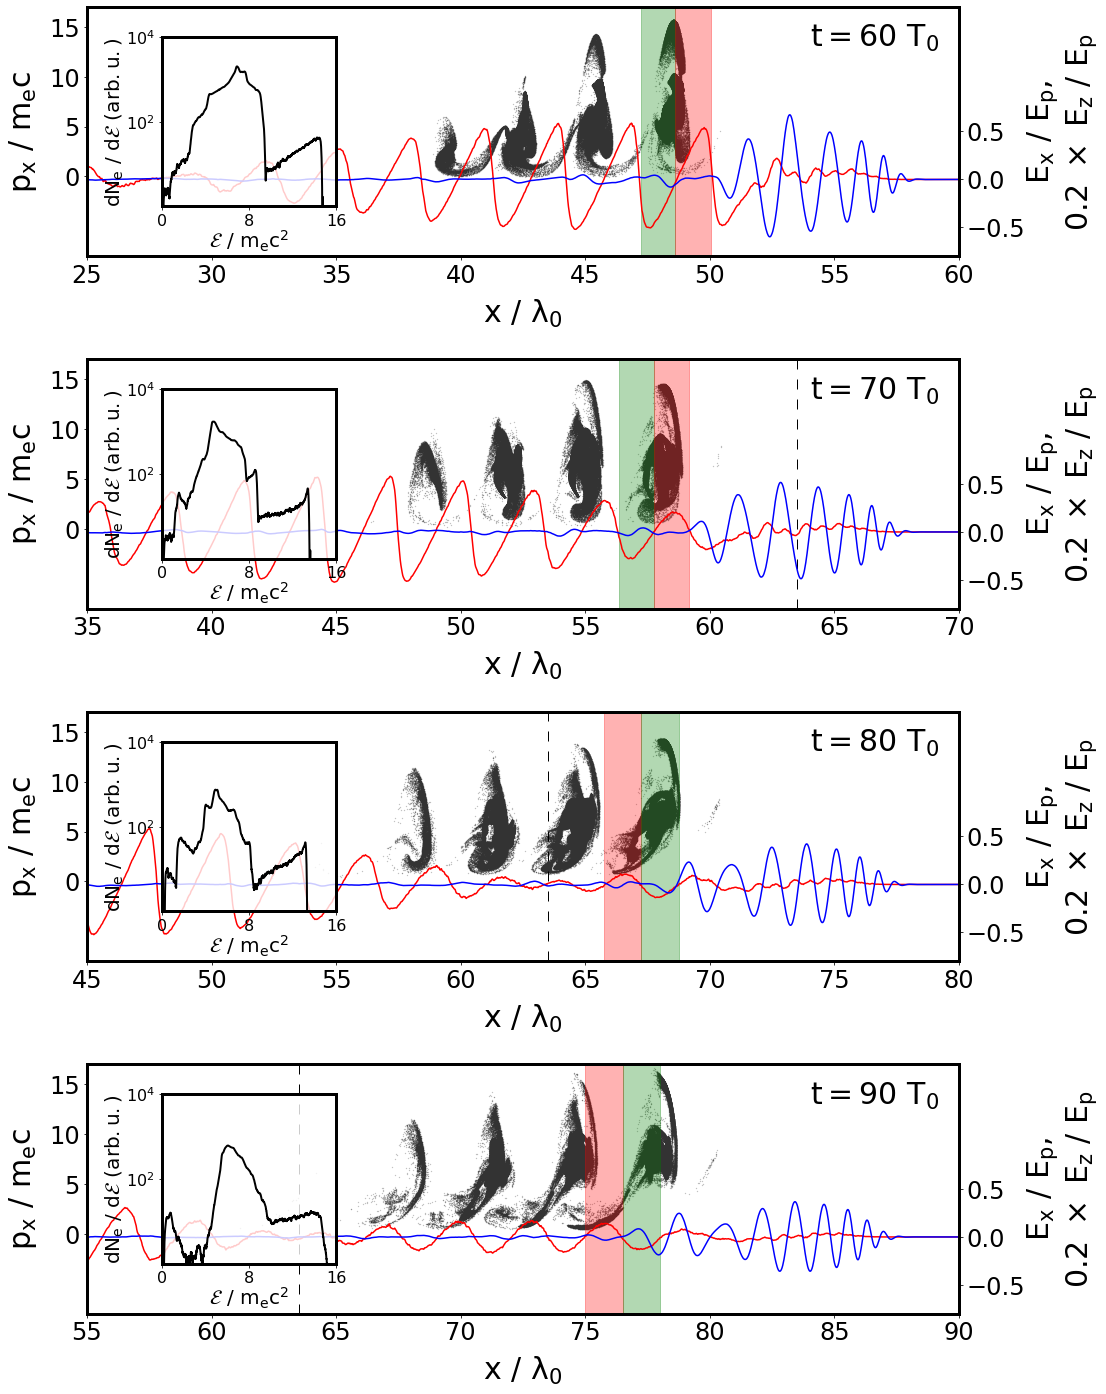

In [20]:
fig, ax = plt.subplots(4, 1, figsize=(16, 20))

ax[0].plot(x_inj_1[cond_1], px_inj_1[cond_1], ".", markersize=0.5, alpha=0.5, color="0.2", rasterized=True)
ax[0].set_xlim(25, 60)
ax[0].set_ylim(-8, 17)
ax[0].axvline(63.5, color="black", linestyle="--", linewidth=1.0, dashes=(10, 10))
ax[0].tick_params(axis="both", which="major", labelsize=24)
ax[0].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0} $", fontsize=30, labelpad=10)
ax[0].set_ylabel(r"$ \mathrm{p_x \ / \ m_e c} $", fontsize=30, labelpad=10)
ax[0].get_yaxis().set_ticks([0, 5, 10, 15])
ax[0].text(54, 13, r"$ \mathrm{t = 60 \ T_0} $", fontsize=30)

ax_0b = ax[0].twinx()
ax_0b.plot(grid_x, e_x[1200, :], color="red")
ax_0b.plot(grid_x, 0.2 * e_z[1200, :], color="blue")
ax_0b.set_ylim(-0.8, 1.8)
ax_0b.tick_params(axis="both", which="major", labelsize=24)
ax_0b.set_ylabel(r"$ \mathrm{E_x \ / \ E_p,} $" + "\n" + r"$ \mathrm{0.2 \ \times \ E_z \ / \ E_p} $", fontsize=30, labelpad=0)
ax_0b.get_yaxis().set_ticks([-0.5, 0.0, 0.5])
ax_0b.axvspan(47.25, 48.6, color='green', alpha=0.3)
ax_0b.axvspan(48.6, 50.05, color='red', alpha=0.3)

ax_0in = ax_0b.inset_axes([28, -3, 7, 17], transform=ax[0].transData)
ax_0in.semilogy(h_1[1][0:-1], savgol_filter(h_1[0], 51, 3), linewidth=2, color="black")
ax_0in.set_ylim(1e0, 1e4)
ax_0in.set_xlim(0, 16)
ax_0in.get_xaxis().set_ticks([0, 8, 16])
ax_0in.get_yaxis().set_ticks([1e2, 1e4])
ax_0in.set_xlabel(r"$ \mathrm{\mathcal{E} \ / \ m_e c^2} $", fontsize=20, labelpad=0)
ax_0in.set_ylabel(r"$ \mathrm{d N_e \ / \ d \mathcal{E} \ (arb. u.)} $", fontsize=20, labelpad=0)
ax_0in.tick_params(axis="both", which="major", labelsize=16)
ax_0in.patch.set_alpha(0.8)

ax[1].plot(x_inj_2[cond_2], px_inj_2[cond_2], ".", markersize=0.5, alpha=0.5, color="0.2", rasterized=True)
ax[1].set_xlim(35, 70)
ax[1].set_ylim(-8, 17)
ax[1].axvline(63.5, color="black", linestyle="--", linewidth=1.0, dashes=(10, 10))
ax[1].tick_params(axis="both", which="major", labelsize=24)
ax[1].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0} $", fontsize=30, labelpad=10)
ax[1].set_ylabel(r"$ \mathrm{p_x \ / \ m_e c} $", fontsize=30, labelpad=10)
ax[1].get_yaxis().set_ticks([0, 5, 10, 15])
ax[1].text(64, 13, r"$ \mathrm{t = 70 \ T_0} $", fontsize=30)

ax_1b = ax[1].twinx()
ax_1b.plot(grid_x, e_x[1400, :], color="red")
ax_1b.plot(grid_x, 0.2 * e_z[1400, :], color="blue")
ax_1b.set_ylim(-0.8, 1.8)
ax_1b.tick_params(axis="both", which="major", labelsize=24)
ax_1b.set_ylabel(r"$ \mathrm{E_x \ / \ E_p,} $" + "\n" + r"$ \mathrm{0.2 \ \times \ E_z \ / \ E_p} $", fontsize=30, labelpad=0)
ax_1b.get_yaxis().set_ticks([-0.5, 0.0, 0.5])
ax_1b.axvspan(56.35, 57.75, color='green', alpha=0.3)
ax_1b.axvspan(57.75, 59.15, color='red', alpha=0.3)

ax_1in = ax_1b.inset_axes([38, -3, 7, 17], transform=ax[1].transData)
ax_1in.semilogy(h_2[1][0:-1], savgol_filter(h_2[0], 51, 3), linewidth=2, color="black")
ax_1in.set_ylim(1e0, 1e4)
ax_1in.set_xlim(0, 16)
ax_1in.get_xaxis().set_ticks([0, 8, 16])
ax_1in.get_yaxis().set_ticks([1e2, 1e4])
ax_1in.set_xlabel(r"$ \mathrm{\mathcal{E} \ / \ m_e c^2} $", fontsize=20, labelpad=0)
ax_1in.set_ylabel(r"$ \mathrm{d N_e \ / \ d \mathcal{E} \ (arb. u.)} $", fontsize=20, labelpad=0)
ax_1in.tick_params(axis="both", which="major", labelsize=16)
ax_1in.patch.set_alpha(0.8)

ax[2].plot(x_inj_3[cond_3], px_inj_3[cond_3], ".", markersize=0.5, alpha=0.5, color="0.2", rasterized=True)
ax[2].set_xlim(45, 80)
ax[2].set_ylim(-8, 17)
ax[2].axvline(63.5, color="black", linestyle="--", linewidth=1.0, dashes=(10, 10))
ax[2].tick_params(axis="both", which="major", labelsize=24)
ax[2].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0} $", fontsize=30, labelpad=10)
ax[2].set_ylabel(r"$ \mathrm{p_x \ / \ m_e c} $", fontsize=30, labelpad=10)
ax[2].get_yaxis().set_ticks([0, 5, 10, 15])
ax[2].text(74, 13, r"$ \mathrm{t = 80 \ T_0} $", fontsize=30)

ax_2b = ax[2].twinx()
ax_2b.plot(grid_x, e_x[1600, :], color="red")
ax_2b.plot(grid_x, 0.2 * e_z[1600, :], color="blue")
ax_2b.set_ylim(-0.8, 1.8)
ax_2b.tick_params(axis="both", which="major", labelsize=24)
ax_2b.set_ylabel(r"$ \mathrm{E_x \ / \ E_p,} $" + "\n" + r"$ \mathrm{0.2 \ \times \ E_z \ / \ E_p} $", fontsize=30, labelpad=0)
ax_2b.get_yaxis().set_ticks([-0.5, 0.0, 0.5])
ax_2b.axvspan(65.75, 67.25, color='red', alpha=0.3)
ax_2b.axvspan(67.25, 68.75, color='green', alpha=0.3)

ax_2in = ax_2b.inset_axes([48, -3, 7, 17], transform=ax[2].transData)
ax_2in.semilogy(h_3[1][0:-1], savgol_filter(h_3[0], 51, 3), linewidth=2, color="black")
ax_2in.set_ylim(1e0, 1e4)
ax_2in.set_xlim(0, 16)
ax_2in.get_xaxis().set_ticks([0, 8, 16])
ax_2in.get_yaxis().set_ticks([1e2, 1e4])
ax_2in.set_xlabel(r"$ \mathrm{\mathcal{E} \ / \ m_e c^2} $", fontsize=20, labelpad=0)
ax_2in.set_ylabel(r"$ \mathrm{d N_e \ / \ d \mathcal{E} \ (arb. u.)} $", fontsize=20, labelpad=0)
ax_2in.tick_params(axis="both", which="major", labelsize=16)
ax_2in.patch.set_alpha(0.8)

ax[3].plot(x_inj_4[cond_4], px_inj_4[cond_4], ".", markersize=0.5, alpha=0.5, color="0.2", rasterized=True)
ax[3].set_xlim(55, 90)
ax[3].set_ylim(-8, 17)
ax[3].axvline(63.5, color="black", linestyle="--", linewidth=1.0, dashes=(10, 10))
ax[3].tick_params(axis="both", which="major", labelsize=24)
ax[3].set_xlabel(r"$ \mathrm{x \ / \ \lambda_0} $", fontsize=30, labelpad=10)
ax[3].set_ylabel(r"$ \mathrm{p_x \ / \ m_e c} $", fontsize=30, labelpad=10)
ax[3].get_yaxis().set_ticks([0, 5, 10, 15])
ax[3].text(84, 13, r"$ \mathrm{t = 90 \ T_0} $", fontsize=30)

ax_3b = ax[3].twinx()
ax_3b.plot(grid_x, e_x[1800, :], color="red")
ax_3b.plot(grid_x, 0.2 * e_z[1800, :], color="blue")
ax_3b.set_ylim(-0.8, 1.8)
ax_3b.tick_params(axis="both", which="major", labelsize=24)
ax_3b.set_ylabel(r"$ \mathrm{E_x \ / \ E_p,} $" + "\n" + r"$ \mathrm{0.2 \ \times \ E_z \ / \ E_p} $", fontsize=30, labelpad=0)
ax_3b.get_yaxis().set_ticks([-0.5, 0.0, 0.5])
ax_3b.axvspan(75.0, 76.50, color='red', alpha=0.3)
ax_3b.axvspan(76.50, 78.00, color='green', alpha=0.3)

ax_3in = ax_3b.inset_axes([58, -3, 7, 17], transform=ax[3].transData)
ax_3in.semilogy(h_4[1][0:-1], savgol_filter(h_4[0], 51, 3), linewidth=2, color="black")
ax_3in.set_ylim(1e0, 1e4)
ax_3in.set_xlim(0, 16)
ax_3in.get_xaxis().set_ticks([0, 8, 16])
ax_3in.get_yaxis().set_ticks([1e2, 1e4])
ax_3in.set_xlabel(r"$ \mathrm{\mathcal{E} \ / \ m_e c^2} $", fontsize=20, labelpad=0)
ax_3in.set_ylabel(r"$ \mathrm{d N_e \ / \ d \mathcal{E} \ (arb. u.)} $", fontsize=20, labelpad=0)
ax_3in.tick_params(axis="both", which="major", labelsize=16)
ax_3in.patch.set_alpha(0.8)

fig.tight_layout(pad=3)